<a href="https://colab.research.google.com/github/mart-77/OpenData/blob/main/Proyecto_Open_Data_MartinRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga y Limpieza

In [3]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving causascorrupcion.csv to causascorrupcion.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['causascorrupcion.csv']), encoding = 'latin-1')
df.head()

,codigoCaso,nroExpediente,caratula,hechoPunible,nombreFiscal,listaHechosPunibles,despachoJudicialCausa,estadoCasoDespacho,fechaPrimerActo,Column1
0,303789,1 - 6 - 3 - 1 - 1999 - 50012,"IGNACIO ROJAS GOMEZ, EDGAR ANTONIO GONZALEZ Y ...",Coacción,"ROJAS MARTINEZ , CARLOS JORGE",NaN,JUZGADO DE EJECUCION PENAL PRIMER TURNO Sria. 1,Activo,12/13/1999,NaN
1,1503798,1 - 5 - 2 - 14 - 2017 - 1215,NOEMI KIKUCHI DE ACOSTA S/APROPIACIÓN,Lesión de confianza,"ALVAREZ RAMIREZ , MARIA BERNARDA",NaN,JUZGADO PENAL DE GARANTIAS NRO. 7,Activo,12/11/2018,NaN
2,2477011,1 - 5 - 2 - 1 - 2023 - 19,INVESTIGACIÓN FISCAL S/ COHECHO PASIVO Y OTROS,Cohecho pasivo (Ley N° 6379),"ARZAMENDIA OVANDO , DIEGO AUGUSTO",NaN,JUZGADO PENAL DE GARANTIAS ESPECIALIZADO EN DE...,Activo,4/18/2023,NaN
3,2476371,1 - 5 - 2 - 1 - 2022 - 8,COMISO ESPECIAL AUTONOMO EN LA CAUSA LUIZ HENR...,Lavado de dinero mayor a 750 Jornales (Delitos...,"SILVA ESTECHE , NATHALIA PAOLA",NaN,JUZGADO DE SENTENCIA ESPECIALIZADO EN DELITOS ...,Activo,4/18/2023,NaN
4,1106118,1 - 1 - 3 - 20 - 2016 - 1423,"GERARDO CESPEDES, NERY LEZCANO CAÑETE, CARLOS ...",Coacción,"NOGUERA LEGUIZAMON , JORGE ANTONIO",NaN,JUZGADO DE EJECUCION PENAL TERCER TURNO Sria. 5,Activo,12/28/2016,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   codigoCaso             755 non-null    int64  
 1   nroExpediente          755 non-null    object 
 2   caratula               755 non-null    object 
 3   hechoPunible           755 non-null    object 
 4   nombreFiscal           599 non-null    object 
 5   listaHechosPunibles    0 non-null      float64
 6   despachoJudicialCausa  755 non-null    object 
 7   estadoCasoDespacho     755 non-null    object 
 8   fechaPrimerActo        753 non-null    object 
 9   Column1                0 non-null      float64
dtypes: float64(2), int64(1), object(7)
memory usage: 59.1+ KB


In [6]:
df = df.drop(columns = ['Column1'])
df = df.drop(columns = ['listaHechosPunibles'])
df.head()

,codigoCaso,nroExpediente,caratula,hechoPunible,nombreFiscal,despachoJudicialCausa,estadoCasoDespacho,fechaPrimerActo
0,303789,1 - 6 - 3 - 1 - 1999 - 50012,"IGNACIO ROJAS GOMEZ, EDGAR ANTONIO GONZALEZ Y ...",Coacción,"ROJAS MARTINEZ , CARLOS JORGE",JUZGADO DE EJECUCION PENAL PRIMER TURNO Sria. 1,Activo,12/13/1999
1,1503798,1 - 5 - 2 - 14 - 2017 - 1215,NOEMI KIKUCHI DE ACOSTA S/APROPIACIÓN,Lesión de confianza,"ALVAREZ RAMIREZ , MARIA BERNARDA",JUZGADO PENAL DE GARANTIAS NRO. 7,Activo,12/11/2018
2,2477011,1 - 5 - 2 - 1 - 2023 - 19,INVESTIGACIÓN FISCAL S/ COHECHO PASIVO Y OTROS,Cohecho pasivo (Ley N° 6379),"ARZAMENDIA OVANDO , DIEGO AUGUSTO",JUZGADO PENAL DE GARANTIAS ESPECIALIZADO EN DE...,Activo,4/18/2023
3,2476371,1 - 5 - 2 - 1 - 2022 - 8,COMISO ESPECIAL AUTONOMO EN LA CAUSA LUIZ HENR...,Lavado de dinero mayor a 750 Jornales (Delitos...,"SILVA ESTECHE , NATHALIA PAOLA",JUZGADO DE SENTENCIA ESPECIALIZADO EN DELITOS ...,Activo,4/18/2023
4,1106118,1 - 1 - 3 - 20 - 2016 - 1423,"GERARDO CESPEDES, NERY LEZCANO CAÑETE, CARLOS ...",Coacción,"NOGUERA LEGUIZAMON , JORGE ANTONIO",JUZGADO DE EJECUCION PENAL TERCER TURNO Sria. 5,Activo,12/28/2016


In [7]:
df['fechaPrimerActo'] = pd.to_datetime(df['fechaPrimerActo'], format='%m/%d/%Y', errors='coerce')

In [8]:
df['fechaPrimerActo'] = df['fechaPrimerActo'].fillna(pd.to_datetime('11/11/2222'))
df['nombreFiscal'] = df['nombreFiscal'].fillna('')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   codigoCaso             755 non-null    int64         
 1   nroExpediente          755 non-null    object        
 2   caratula               755 non-null    object        
 3   hechoPunible           755 non-null    object        
 4   nombreFiscal           755 non-null    object        
 5   despachoJudicialCausa  755 non-null    object        
 6   estadoCasoDespacho     755 non-null    object        
 7   fechaPrimerActo        755 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 47.3+ KB


In [10]:
df.duplicated().sum()


87

In [11]:
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

     codigoCaso                 nroExpediente  \
37      1927884   1 - 1 - 2 - 46 - 2021 - 414   
38      1927884   1 - 1 - 2 - 46 - 2021 - 414   
40      1871630  1 - 1 - 2 - 46 - 2020 - 3366   
41      1871630  1 - 1 - 2 - 46 - 2020 - 3366   
55      1631095   1 - 1 - 2 - 44 - 2018 - 643   
..          ...                           ...   
677     1174568    1 - 1 - 1 - 40 - 2017 - 16   
678     1174568    1 - 1 - 1 - 40 - 2017 - 16   
679     1174568    1 - 1 - 1 - 40 - 2017 - 16   
680     1174568    1 - 1 - 1 - 40 - 2017 - 16   
681     1174568    1 - 1 - 1 - 40 - 2017 - 16   

                                              caratula  \
37       RODRIGO ROMAN REYES MARTINEZ S/COACCIÓN GRAVE   
38       RODRIGO ROMAN REYES MARTINEZ S/COACCIÓN GRAVE   
40   ARNALDO VICENTDE OJEDA GONZALEZ Y OTROS S/HOMI...   
41   ARNALDO VICENTDE OJEDA GONZALEZ Y OTROS S/HOMI...   
55   MIGUEL JORGE CUEVAS RUIZ DIAZ Y OTROS S/ENRIQU...   
..                                                 ...   
677  

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 754
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   codigoCaso             668 non-null    int64         
 1   nroExpediente          668 non-null    object        
 2   caratula               668 non-null    object        
 3   hechoPunible           668 non-null    object        
 4   nombreFiscal           668 non-null    object        
 5   despachoJudicialCausa  668 non-null    object        
 6   estadoCasoDespacho     668 non-null    object        
 7   fechaPrimerActo        668 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 47.0+ KB


In [116]:
df.to_csv('causascorrupcionMod.csv', index=False, encoding='utf-8-sig')
files.download('causascorrupcionMod.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analisis Descriptivo

In [14]:
df.describe()

,codigoCaso,fechaPrimerActo
count,6.680000e+02,668
mean,1.021989e+06,2013-02-18 20:33:03.233532928
min,1.620220e+05,1997-09-26 00:00:00
25%,2.358592e+05,2004-03-02 18:00:00
50%,6.334130e+05,2014-02-20 00:00:00
75%,1.818540e+06,2020-09-04 06:00:00
max,2.809281e+06,2222-11-11 00:00:00
std,8.730428e+05,NaN


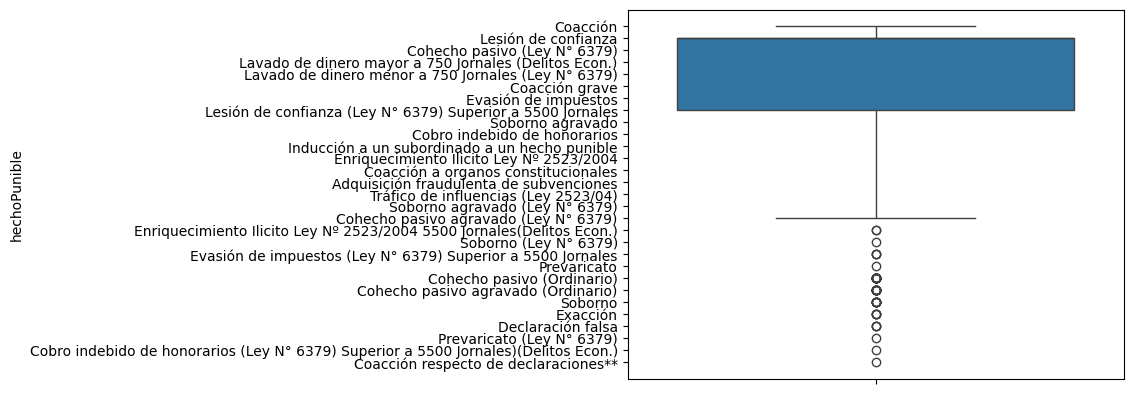

In [16]:
import seaborn as sns
sns.boxplot(y = df["hechoPunible"]);
